In [2]:
#import packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [5]:
#import packages 
import numpy as np
import pandas as pd

#load data
df = pd.read_csv('medical_clean.csv',encoding='latin-1')

df

df.describe() 

#drop complicating variables
df = df.drop(['City'], axis=1)
df = df.drop(['State'], axis=1)
df = df.drop(['County'], axis=1)
df = df.drop(['TimeZone'], axis=1)
df = df.drop(['Job'], axis=1)
df = df.drop(['Lng'], axis=1)
df = df.drop(['Lat'], axis=1)
df = df.drop(['Zip'], axis=1)


#transform boolean data 
Booleate = pd.get_dummies(df[['Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Reflux_esophagitis', 'Asthma', 'HighBlood', 'Overweight','ReAdmis','Soft_drink','Stroke','Anxiety', 'Allergic_rhinitis']])

df = pd.concat((df,Booleate), axis=1)

df= df.drop(['Arthritis'], axis=1)
df= df.drop(['Diabetes'], axis=1)
df= df.drop(['Hyperlipidemia'], axis=1)
df = df.drop(['BackPain'], axis=1)
df = df.drop(['Reflux_esophagitis'], axis=1)
df = df.drop(['Asthma'], axis=1)
df = df.drop(['HighBlood'], axis=1)
df = df.drop(['Overweight'], axis=1)
df = df.drop(['ReAdmis'], axis=1)
df = df.drop(['Soft_drink'], axis=1)
df = df.drop(['Stroke'], axis=1)
df = df.drop(['Anxiety'], axis=1)
df = df.drop(['Allergic_rhinitis'], axis=1)
df = df.drop(['Arthritis_No'], axis=1)
df = df.drop(['Diabetes_No'], axis=1)
df = df.drop(['Hyperlipidemia_No'], axis=1)
df = df.drop(['BackPain_No'], axis=1)
df = df.drop(['Reflux_esophagitis_No'], axis=1)
df = df.drop(['Asthma_No'], axis=1)
df = df.drop(['HighBlood_No'], axis=1)
df = df.drop(['Overweight_No'], axis=1)
df = df.drop(['ReAdmis_No'], axis=1)
df = df.drop(['Soft_drink_No'], axis=1)
df = df.drop(['Stroke_No'], axis=1)
df = df.drop(['Anxiety_No'], axis=1)
df = df.drop(['Allergic_rhinitis_No'], axis=1)

df = df.rename(columns={"Arthritis_Yes":"Arthritis"})
df = df.rename(columns={"Diabetes_Yes":"Diabetes"})
df = df.rename(columns={"Hyperlipidemia_Yes":"Hyperlipidemia"})
df = df.rename(columns={"BackPain_Yes":"BackPain"})
df = df.rename(columns={"Reflux_esophagitis_Yes":"Reflux_esophagitis"})
df = df.rename(columns={"Asthma_Yes":"Asthma"})
df = df.rename(columns={"Reflux_esophagitis_Yes":"Reflux_esophagitis"})
df = df.rename(columns={"Asthma_Yes":"Asthma"})
df = df.rename(columns={"HighBlood_Yes":"HighBlood"})
df = df.rename(columns={"Overweight_Yes":"Overweight"})
df = df.rename(columns={"ReAdmis_Yes":"ReAdmis"})
df = df.rename(columns={"Soft_drink_Yes":"Soft_drink"})
df = df.rename(columns={"Stroke_Yes":"Stroke"})
df = df.rename(columns={"Anxiety_Yes":"Anxiety"})
df = df.rename(columns={"Allergic_rhinitis_Yes":"Allergic_rhinitis"})

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Population          10000 non-null  int64  
 1   Area                10000 non-null  object 
 2   Children            10000 non-null  int64  
 3   Age                 10000 non-null  int64  
 4   Income              10000 non-null  float64
 5   Marital             10000 non-null  object 
 6   Gender              10000 non-null  object 
 7   VitD_levels         10000 non-null  float64
 8   Doc_visits          10000 non-null  int64  
 9   Full_meals_eaten    10000 non-null  int64  
 10  vitD_supp           10000 non-null  int64  
 11  Initial_admin       10000 non-null  object 
 12  Complication_risk   10000 non-null  object 
 13  Services            10000 non-null  object 
 14  Initial_days        10000 non-null  float64
 15  TotalCharge         10000 non-null  float64
 16  Addit

In [6]:
# create dummy variables 
dummies= pd.get_dummies(df[["Area","Marital","Gender","Initial_admin","Services","Complication_risk",]])
df = pd.concat([df, dummies], axis=1)

df = df.drop(['Area'], axis=1)
df = df.drop(['Marital'], axis=1)
df = df.drop(['Gender'], axis=1)
df = df.drop(['Initial_admin'], axis=1)
df = df.drop(['Services'], axis=1)
df = df.drop(['Complication_risk'], axis=1)


In [7]:
#drop k-1 dummy variables
df = df.drop(['Area_Rural'], axis=1)
df = df.drop(['Marital_Never Married'], axis=1)
df = df.drop(['Gender_Female'], axis=1)
df = df.drop(['Initial_admin_Elective Admission'], axis=1)
df = df.drop(['Services_Blood Work'], axis=1)
df = df.drop(['Complication_risk_Low'], axis=1)

# transform variables
df['Population'] = df['Population'].astype(int)
df['Children'] = df['Children'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Income'] = df['Age'].astype(int)
df['VitD_levels'] = df['Age'].astype(int)
df['Initial_days'] = df['Age'].astype(int)
df['TotalCharge'] = df['Age'].astype(int)
df['Additional_charges'] = df['Age'].astype(int)
df['Doc_visits'] = df['Doc_visits'].astype(int)
df['Full_meals_eaten'] = df['Full_meals_eaten'].astype(int)
df['vitD_supp'] = df['vitD_supp'].astype(int)
df['Item1'] = df['Item1'].astype(int)
df['Item2'] = df['Item2'].astype(int)
df['Item3'] = df['Item3'].astype(int)
df['Item4'] = df['Item4'].astype(int)
df['Item5'] = df['Item5'].astype(int)
df['Item6'] = df['Item6'].astype(int)
df['Item7'] = df['Item7'].astype(int)
df['Item8'] = df['Item8'].astype(int)
df['Area_Suburban'] = df['Area_Suburban'].astype(int)
df['Area_Urban'] = df['Area_Urban'].astype(int)
df['Marital_Divorced'] = df['Marital_Divorced'].astype(int)
df['Marital_Married'] = df['Marital_Married'].astype(int)
df['Marital_Separated'] = df['Marital_Separated'].astype(int)
df['Marital_Widowed'] = df['Marital_Widowed'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)
df['Gender_Nonbinary'] = df['Gender_Nonbinary'].astype(int)
df['Initial_admin_Emergency Admission'] = df['Initial_admin_Emergency Admission'].astype(int)
df['Initial_admin_Observation Admission'] = df['Initial_admin_Observation Admission'].astype(int)
df['Services_CT Scan'] = df['Services_CT Scan'].astype(int)
df['Services_Intravenous'] = df['Services_Intravenous'].astype(int)
df['Services_MRI'] = df['Services_MRI'].astype(int)
df['Complication_risk_High'] = df['Complication_risk_High'].astype(int)
df['Complication_risk_Medium'] = df['Complication_risk_Medium'].astype(int)

df['HighBlood'] = df['HighBlood'].astype(int)
df['Stroke'] = df['Stroke'].astype(int)
df['Overweight'] = df['Overweight'].astype(int)
df['Arthritis'] = df['Arthritis'].astype(int)
df['Diabetes'] = df['Diabetes'].astype(int)
df['Hyperlipidemia'] = df['Hyperlipidemia'].astype(int)
df['BackPain'] = df['BackPain'].astype(int)
df['Anxiety'] = df['Anxiety'].astype(int)
df['Allergic_rhinitis'] = df['Allergic_rhinitis'].astype(int)
df['Reflux_esophagitis'] = df['Reflux_esophagitis'].astype(int)
df['Asthma'] = df['Asthma'].astype(int)
df['ReAdmis'] = df['ReAdmis'].astype(int)
df['Soft_drink'] = df['Soft_drink'].astype(int)
df['Stroke'] = df['Stroke'].astype(int)
df['Anxiety'] = df['Anxiety'].astype(int)
df['Allergic_rhinitis'] = df['Allergic_rhinitis'].astype(int)


In [8]:
#import packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [9]:
#create x&y variables 
X = df.drop('TotalCharge',axis='columns')
y = df['TotalCharge']

#create test and training sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#create and fit model
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=20)

In [10]:
#create prediction models
y_pred = model.predict(X_test)

In [11]:
#compute AUC 
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
metrics.auc(fpr, tpr)


/Users/mdenna/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


nan

In [12]:
#get model accuracy score
model.score(X_test, y_test)


0.9965

In [13]:
#get model predictions
y_predicted = model.predict(X_test)
y_predicted


array([19, 65, 62, ..., 51, 31, 52])

In [14]:
#create confusion matrix
cm = confusion_matrix(y_test, y_predicted)
cm


array([[37,  0,  0, ...,  0,  0,  0],
       [ 0, 27,  0, ...,  0,  0,  0],
       [ 0,  0, 24, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 24,  0,  0],
       [ 0,  0,  0, ...,  0, 29,  0],
       [ 0,  0,  0, ...,  0,  0, 30]])

Text(95.72222222222221, 0.5, 'Truth')

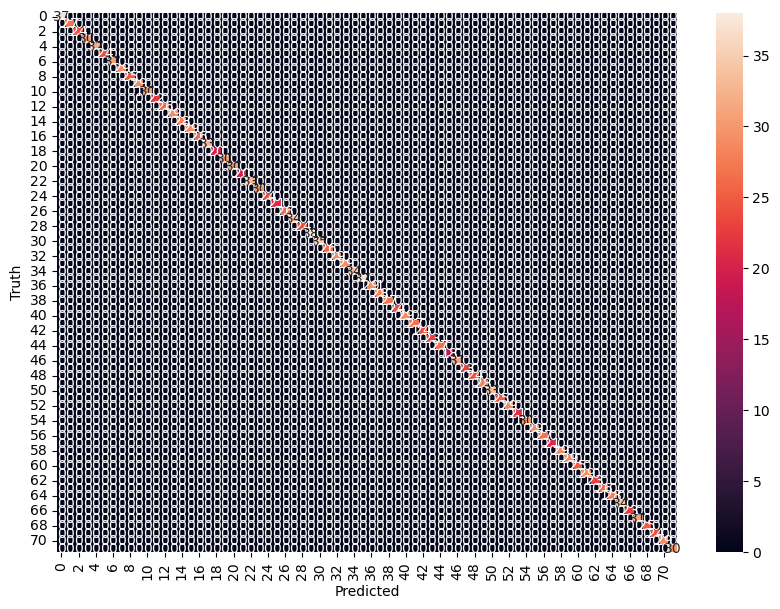

In [15]:
#create prediction matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [16]:
#how close to the regression are the datapoints
from sklearn.metrics import mean_squared_error
mean_squared_error (y_test, y_predicted)

#get model accuracy score
model.score(X_test, y_test)

#create confusion matrix
cm = confusion_matrix(y_test, y_predicted)
cm


array([[37,  0,  0, ...,  0,  0,  0],
       [ 0, 27,  0, ...,  0,  0,  0],
       [ 0,  0, 24, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 24,  0,  0],
       [ 0,  0,  0, ...,  0, 29,  0],
       [ 0,  0,  0, ...,  0,  0, 30]])

In [17]:
#get model predictions
y_predicted = model.predict(X_test)
y_predicted

#get model accuracy score
model.score(X_test, y_test)


0.9965